In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np 
import pandas as pd 
from tqdm import tqdm

In [2]:
train=pd.read_csv('../input/facecounting/train_fc/train.csv')
box_train=pd.read_csv('../input/facecounting/train_fc/bbox_train.csv')
test=pd.read_csv('../input/facecounting/test_fc.csv')
img_dir="../input/facecounting/train_fc/image_data/"


In [3]:
train.head()

,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

import os
import json
import time
import numpy as np
from PIL import Image
import torch
from tqdm import tqdm
import cv2


In [5]:
test1=[]
facedetector=cv2.CascadeClassifier("../input/haar-cascades-for-face-detection/haarcascade_frontalface_alt.xml")
for i in tqdm(range(test.shape[0])):
    z1 = '../input/facecounting/train_fc/image_data/'+ test['Name'][i]
    #print(z1)
    img = cv2.imread(z1 ,0)
    face=facedetector.detectMultiScale(img,
                                 scaleFactor=1.1, 
                                 minNeighbors=3, 
                                 minSize=(20, 20)
                                 )
    test1.append(len(face))

100%|██████████| 2463/2463 [08:40<00:00,  4.73it/s]


In [6]:
test1

[2,
 1,
 1,
 4,
 3,
 3,
 3,
 3,
 3,
 1,
 0,
 2,
 1,
 0,
 1,
 4,
 1,
 2,
 0,
 0,
 1,
 3,
 1,
 3,
 3,
 2,
 0,
 2,
 0,
 2,
 1,
 0,
 4,
 8,
 2,
 3,
 1,
 1,
 3,
 3,
 1,
 0,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 0,
 2,
 3,
 7,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 5,
 2,
 2,
 2,
 2,
 1,
 5,
 5,
 5,
 7,
 4,
 3,
 3,
 3,
 7,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 4,
 6,
 3,
 0,
 0,
 2,
 0,
 0,
 2,
 3,
 3,
 12,
 4,
 6,
 7,
 3,
 1,
 5,
 3,
 6,
 1,
 3,
 4,
 1,
 5,
 0,
 0,
 5,
 3,
 0,
 5,
 0,
 1,
 2,
 1,
 2,
 1,
 4,
 1,
 1,
 3,
 1,
 0,
 1,
 2,
 1,
 4,
 2,
 1,
 2,
 1,
 5,
 2,
 0,
 1,
 2,
 4,
 4,
 0,
 0,
 0,
 0,
 1,
 4,
 0,
 2,
 2,
 4,
 2,
 1,
 4,
 1,
 5,
 1,
 0,
 4,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 3,
 0,
 1,
 2,
 0,
 2,
 0,
 3,
 3,
 0,
 4,
 3,
 2,
 5,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 5,
 5,
 0,
 1,
 2,
 0,
 2,
 2,
 4,
 2,
 3,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 4,
 2,
 2,
 1,
 3,
 3,
 4,
 1,
 6,
 3,
 4,
 5,
 2,
 0,
 2,
 4,
 3,
 8,
 3,
 2,
 3,
 3,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 7,
 0,
 4,

In [7]:
import sys
sys.path.append('../input/retinafacetorch')
from retina import retinaface_model, detect_images

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
model = retinaface_model(model_path='../input/retinafacetorch/Resnet50_Final.pth',device=device)

Loading pretrained model from ../input/retinafacetorch/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456


In [10]:
my=cv2.imread("../input/facecounting/train_fc/image_data/10022.jpg")
my = cv2.cvtColor(my, cv2.COLOR_BGR2RGB)
bboxes = detect_images(imgs=[np.float32(my)], net=model, thresh=0.94, device=device, batch_run=False , rescale_factor = 1.1)

In [11]:
print(bboxes)
print("Total no. of faces: ",len(bboxes[0]))

[array([[163.18178   , 139.21567   , 253.21646   , 265.9617    ,
          0.99984515],
       [265.54977   , 127.21419   , 363.4773    , 285.12927   ,
          0.9998084 ],
       [368.5677    , 169.0642    , 452.32083   , 282.0672    ,
          0.99963045],
       [450.16824   ,  98.06402   , 560.63965   , 246.36774   ,
          0.99961084]], dtype=float32)]
Total no. of faces:  4


Rectangle(xy=(163.182, 139.216), width=90.0347, height=126.746, angle=0)
Rectangle(xy=(265.55, 127.214), width=97.9275, height=157.915, angle=0)
Rectangle(xy=(368.568, 169.064), width=83.7531, height=113.003, angle=0)
Rectangle(xy=(450.168, 98.064), width=110.471, height=148.304, angle=0)


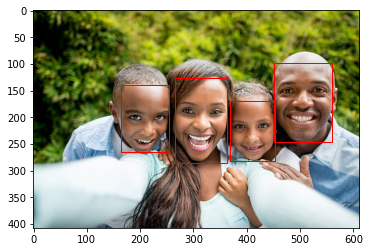

In [12]:
fig,ax = plt.subplots(1)
im = my
ax.imshow(im)
for b in bboxes[0]:
    rect = patches.Rectangle((b[0],b[1]),(b[2]-b[0]),(b[3]-b[1]),linewidth=1,edgecolor='r',facecolor='none')
    print(rect)
    ax.add_patch(rect)
plt.show()

In [13]:
x3 =[]
for i in tqdm(range(test.shape[0])):
    z1 = '../input/facecounting/train_fc/image_data/'+ test['Name'][i]
    #print(z1)
    img = cv2.imread(z1 ,0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bboxes = detect_images(imgs=[np.float32(img)], net=model, thresh=0.58, device=device, batch_run=False , rescale_factor = 1.3)
    x3.append(len(bboxes[0]))

100%|██████████| 2463/2463 [04:25<00:00,  9.29it/s]


In [14]:
submissions = pd.DataFrame({'Name':test['Name'],'HeadCount':x3})
submissions.to_csv("submission.csv",index = False)